# Practice for SQL with Pandas

Import the required libraries and bring in the data.

In [1]:
# Run this code without change

import sqlite3
import pandas as pd
from pandasql import sqldf
from matplotlib import pyplot as plt

conn = sqlite3.Connection('data.sqlite')

1. Read in the products table as a Pandas dataframe.
- Call it `df`
- Look at the first five rows

In [2]:
df = pd.read_sql_query("""
SELECT *
FROM products; 
""", conn)

df.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


2. Using `read.sql()` from Pandas
- Determine the average MSRP by product line
- Give the average the alias of avgMSRP
- Sort alphabetically A-Z by product line

In [ ]:
# Average MSRP by product line 
query = ("""
SELECT productLine, AVG(MSRP) AS avgMSRP
FROM products
GROUP BY productLine
ORDER BY productLine;
""")

df_query = pd.read_sql_query(query, conn)
df_query.head()

,productLine,avgMSRP
0,Classic Cars,118.021053
1,Motorcycles,97.178462
2,Planes,89.515833
3,Ships,86.563333
4,Trains,73.853333


3. Using matplotlib, create a scatterplot that shows `buyPrice` vs `MSRP`

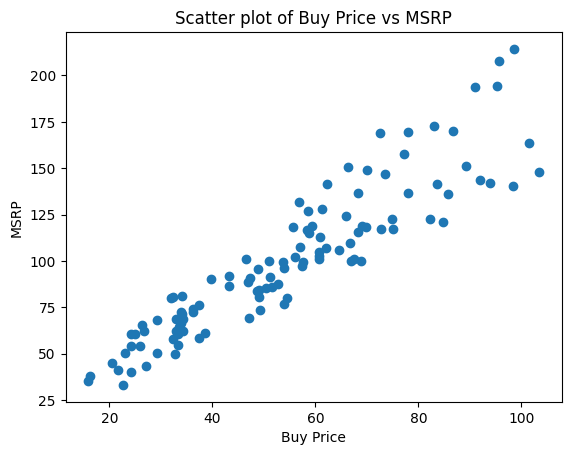

In [ ]:
# Scatter plot buyPrice vs MSRP
import matplotlib.pyplot as plt

plt.scatter(df['buyPrice'], df['MSRP'])
plt.title('Scatter plot of Buy Price vs MSRP')
plt.xlabel('Buy Price')
plt.ylabel('MSRP')
plt.show()

4. Use the DataFrame `eval` method in place to find the difference of MSRP and the buy price
- Call this new column `Price_Difference'
- Look at the first five rows
- Give the number of rows

In [ ]:
# Difference of MSRP and buyPrice 
df['Price_Difference'] = df['MSRP'] - df['buyPrice']
print(df[['MSRP', 'buyPrice', 'Price_Difference']].head())
print(f"Number of rows: {len(df)}")



     MSRP  buyPrice  Price_Difference
0   95.70     48.81             46.89
1  214.30     98.58            115.72
2  118.94     68.99             49.95
3  193.66     91.02            102.64
4  136.00     85.68             50.32
Number of rows: 110


5. Using matplotlib, create a histogram of `Price_Difference`

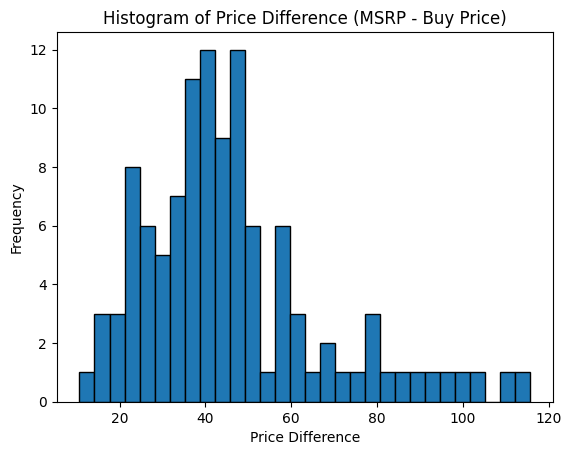

In [6]:
# Histogram of Price_Difference
plt.hist(df['Price_Difference'], bins=30, edgecolor='black')
plt.title('Histogram of Price Difference (MSRP - Buy Price)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()


6. Using slicing, create a DataFrame that contains 'Price_Difference' that is greater than or equal to $50.
- Call this `df_50'
- Look at the number of rows
  - How does this number compare to the number of rows of `df`?

In [ ]:
# DataFrame that contains 'Price_Difference' greater than or equal to $50
df_50 = df[df['Price_Difference'] >= 50]
len(df_50)

32

In [ ]:
# Comparison of the number of rows in the original DataFrame and the filtered DataFrame
comparison = len(df) - len(df_50)
print(comparison)


78


In [11]:
#close the database connection
conn.close()